# **Multi-Agent path finding:**

> Multi-agent path finding or in short refered to as MAPF is a problem for finding paths which are collision or obstacle free for a given set of agents.

# Input:  	
*   A	graph	with N	locations.
*   A	set	of K agents	–	each	with	start	and	goal location.

# Action:
*   An	agent	can	move	or	wait.

# Task:
*   A	path for	each	agent.

# Constraints:
*   Paths	shouldn’t	conflict.
*   Agents	cannot	be	in	the	same	location	at	the	same time.

# Target:
*   Minimize the	sum	of	travel	costs.






# **Sample code for MAPF:**

An example code taken from "Model AI Assignments 2020: A Project on Multi-Agent Path Finding". There are **three** python files and **one** text file required to run the MAPF codes.

1. independent.py (file which contains the code for independent MAPF)
2. visualize.py   (python file used to create the output animation)
3. run_experiments.py   (main file to which other files are imported)
4. exp0.txt     (text file which contains the start and goal locations)

# **Independent MAPF:**

In [ ]:
#importing the required libraries
import time as timer
from single_agent_planner import compute_heuristics, a_star, get_sum_of_cost

The independent MAPF the paths of the agents do not collide with
the environment but are allowed to collide with the paths of the other agents. Thus, there is a collision when the blue agent 1 stays at its goal cell while the green agent 0 moves on top of it. In the visualization animation, both agents turn red when this happens, and a warning is printed on the terminal
showing the details of the collision.


In [ ]:
class IndependentSolver(object):
    #A planner that plans for each robot independently.
    def __init__(self, my_map, starts, goals):
        #my_map   - list of lists specifying obstacle positions
        #starts      - [(x1, y1), (x2, y2), ...] list of start locations
        #goals       - [(x1, y1), (x2, y2), ...] list of goal locations
        
        self.my_map = my_map
        self.starts = starts
        self.goals = goals
        self.num_of_agents = len(goals)
        self.CPU_time = 0

        # compute heuristics for the low-level search
        self.heuristics = []
        for goal in self.goals:
            self.heuristics.append(compute_heuristics(my_map, goal))  

       

The function compute_heuristics receives as input:
* the representation of the environment and the
* goal cell of the agent 

It computes a look-up table with heuristic values using Dijkstra search starting at the goal cell to find a path for the agent.
The second part performs one A* search per agent:

In [ ]:
def find_solution(self):
        """ Finds paths for all agents from their start locations to their goal locations."""
        start_time = timer.time()
        result = []   
        for i in range(self.num_of_agents):  # Find path for each agent
            path = a_star(self.my_map, self.starts[i], self.goals[i], self.heuristics[i], i, [])
            if path is None:
                raise BaseException('No solutions')
            result.append(path)

        self.CPU_time = timer.time() - start_time

The function a_star receives as input :
* the representation of the environment, 
* the start and goal cell of the agent, 
* the heuristic values computed in the constructor, 
* the unique agent id of the agent, 
* a list of constraints 
It performs an A* search to find a path for the agent. The independent MAPF solver does not use constraints.

In [ ]:
#Code to print the CPU time and the sum of costs.
 print("\n Found a solution! \n")
        print("CPU time (s):    {:.2f}".format(self.CPU_time))
        print("Sum of costs:    {}".format(get_sum_of_cost(result)))

        return result

# **Visualization:**

Python code to create an animation which depicts independent multi-agent path finding: 

In [ ]:
#importing the libraries 
from matplotlib.patches import Circle, Rectangle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation

#color of the objects in the animation
Colors = ['green', 'blue', 'orange']

class Animation:
    def __init__(self, my_map, starts, goals, paths):
        self.my_map = np.flip(np.transpose(my_map), 1)
        self.starts = []
        for start in starts:
            self.starts.append((start[1], len(self.my_map[0]) - 1 - start[0]))
        self.goals = []
        for goal in goals:
            self.goals.append((goal[1], len(self.my_map[0]) - 1 - goal[0]))
        self.paths = []
        if paths:
            for path in paths:
                self.paths.append([])
                for loc in path:
                    self.paths[-1].append((loc[1], len(self.my_map[0]) - 1 - loc[0]))

        aspect = len(self.my_map) / len(self.my_map[0])

        self.fig = plt.figure(frameon=False, figsize=(4 * aspect, 4))
        self.ax = self.fig.add_subplot(111, aspect='equal')
        self.fig.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace=None, hspace=None)
        # self.ax.set_frame_on(False)

        self.patches = []
        self.artists = []
        self.agents = dict()
        self.agent_names = dict()
        # create boundary patch

        x_min = -0.5
        y_min = -0.5
        x_max = len(self.my_map) - 0.5
        y_max = len(self.my_map[0]) - 0.5
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        self.patches.append(Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, facecolor='none', edgecolor='gray'))
        for i in range(len(self.my_map)):
            for j in range(len(self.my_map[0])):
                if self.my_map[i][j]:
                    self.patches.append(Rectangle((i - 0.5, j - 0.5), 1, 1, facecolor='gray', edgecolor='gray'))

        # create agents:
        self.T = 0
        # draw goals first
        for i, goal in enumerate(self.goals):
            self.patches.append(Rectangle((goal[0] - 0.25, goal[1] - 0.25), 0.5, 0.5, facecolor=Colors[i % len(Colors)],
                                          edgecolor='black', alpha=0.5))
        for i in range(len(self.paths)):
            name = str(i)
            self.agents[i] = Circle((starts[i][0], starts[i][1]), 0.3, facecolor=Colors[i % len(Colors)],
                                    edgecolor='black')
            self.agents[i].original_face_color = Colors[i % len(Colors)]
            self.patches.append(self.agents[i])
            self.T = max(self.T, len(paths[i]) - 1)
            self.agent_names[i] = self.ax.text(starts[i][0], starts[i][1] + 0.25, name)
            self.agent_names[i].set_horizontalalignment('center')
            self.agent_names[i].set_verticalalignment('center')
            self.artists.append(self.agent_names[i])

        self.animation = animation.FuncAnimation(self.fig, self.animate_func,
                                                 init_func=self.init_func,
                                                 frames=int(self.T + 1) * 10,
                                                 interval=100,
                                                 blit=True)

    def save(self, file_name, speed):
        self.animation.save(
            file_name,
            fps=10 * speed,
            dpi=200,
            savefig_kwargs={"pad_inches": 0, "bbox_inches": "tight"})
#opens another window for animation
    @staticmethod
    def show():
        plt.show()

    def init_func(self):
        for p in self.patches:
            self.ax.add_patch(p)
        for a in self.artists:
            self.ax.add_artist(a)
        return self.patches + self.artists

    def animate_func(self, t):
        for k in range(len(self.paths)):
            pos = self.get_state(t / 10, self.paths[k])
            self.agents[k].center = (pos[0], pos[1])
            self.agent_names[k].set_position((pos[0], pos[1] + 0.5))

        # reset all colors
        for _, agent in self.agents.items():
            agent.set_facecolor(agent.original_face_color)

        # check drive-drive collisions
        agents_array = [agent for _, agent in self.agents.items()]
        for i in range(0, len(agents_array)):
            for j in range(i + 1, len(agents_array)):
                d1 = agents_array[i]
                d2 = agents_array[j]
                pos1 = np.array(d1.center)
                pos2 = np.array(d2.center)
                if np.linalg.norm(pos1 - pos2) < 0.7:
                    d1.set_facecolor('red')
                    d2.set_facecolor('red')
                    print("COLLISION! (agent-agent) ({}, {}) at time {}".format(i, j, t/10))

        return self.patches + self.artists

    @staticmethod
    def get_state(t, path):
        if int(t) <= 0:
            return np.array(path[0])
        elif int(t) >= len(path):
            return np.array(path[-1])
        else:
            pos_last = np.array(path[int(t) - 1])
            pos_next = np.array(path[int(t)])
            pos = (pos_next - pos_last) * (t - int(t)) + pos_last
            return pos


# **Main python file**

File where the sub python files are imported to:

In [ ]:
#!/usr/bin/python
import argparse
import glob
from pathlib import Path
from independent import IndependentSolver
from visualize import Animation
from single_agent_planner import get_sum_of_cost

SOLVER = "CBS"

def print_mapf_instance(my_map, starts, goals):
    print('Start locations')
    print_locations(my_map, starts)
    print('Goal locations')
    print_locations(my_map, goals)


def print_locations(my_map, locations):
    starts_map = [[-1 for _ in range(len(my_map[0]))] for _ in range(len(my_map))]
    for i in range(len(locations)):
        starts_map[locations[i][0]][locations[i][1]] = i
    to_print = ''
    for x in range(len(my_map)):
        for y in range(len(my_map[0])):
            if starts_map[x][y] >= 0:
                to_print += str(starts_map[x][y]) + ' '
            elif my_map[x][y]:
                to_print += '@ '
            else:
                to_print += '. '
        to_print += '\n'
    print(to_print)


def import_mapf_instance(filename):
    f = Path(filename)
    if not f.is_file():
        raise BaseException(filename + " does not exist.")
    f = open(filename, 'r')
    # first line: #rows #columns
    line = f.readline()
    rows, columns = [int(x) for x in line.split(' ')]
    rows = int(rows)
    columns = int(columns)
    #rows lines with the map
    my_map = []
    for r in range(rows):
        line = f.readline()
        my_map.append([])
        for cell in line:
            if cell == '@':
                my_map[-1].append(True)
            elif cell == '.':
                my_map[-1].append(False)
    #agents
    line = f.readline()
    num_agents = int(line)
    #agents lines with the start/goal positions
    starts = []
    goals = []
    for a in range(num_agents):
        line = f.readline()
        sx, sy, gx, gy = [int(x) for x in line.split(' ')]
        starts.append((sx, sy))
        goals.append((gx, gy))
    f.close()
    return my_map, starts, goals


if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Runs various MAPF algorithms')
    parser.add_argument('--instance', type=str, default=None,
                        help='The name of the instance file(s)')
    parser.add_argument('--batch', action='store_true', default=False,
                        help='Use batch output instead of animation')
    parser.add_argument('--solver', type=str, default=SOLVER,
                        help='The solver to use (one of: {CBS,Independent,Prioritized}), defaults to ' + str(SOLVER))
    args = parser.parse_args()


    result_file = open("results.csv", "w", buffering=1)

    for file in sorted(glob.glob(args.instance)):

        print("***Import an instance***")
        my_map, starts, goals = import_mapf_instance(file)
        print_mapf_instance(my_map, starts, goals)


        if args.solver == "Independent":
            print("***Run Independent***")
            solver = IndependentSolver(my_map, starts, goals)
            paths = solver.find_solution()
        else:
            raise RuntimeError("Unknown solver!")

        cost = get_sum_of_cost(paths)
        result_file.write("{},{}\n".format(file, cost))


        if not args.batch:
            print("***Test paths on a simulation***")
            animation = Animation(my_map, starts, goals, paths)
            animation.show()
    result_file.close()


# **Output:**

The output can be obtained passing the following command in the terminal of run_experiments python file :
```
python run_experiments.py --instance instances/exp0.txt --solver Independent

```

**OUTPUT in the Terminal:**

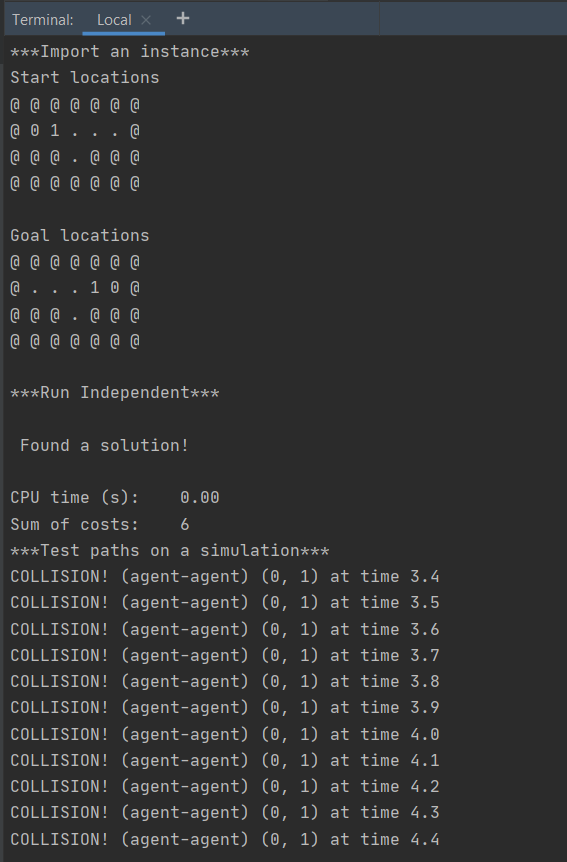

**OUTPUT 1:**

The picture shows the two agents and the path towards their goal.


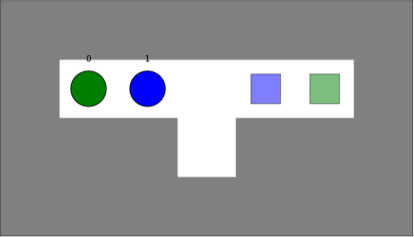

**OUTPUT 2:**

The picture shows the two agents travelling towards their goal.

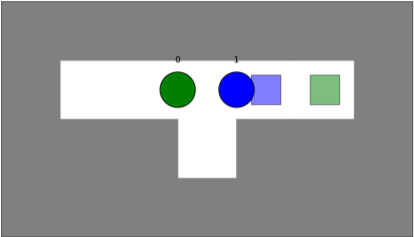

**OUTPUT 3:**

The picture shows the paths of two agents colliding on the way to their goal.
The color of the agents have turned at the point of passage collision.

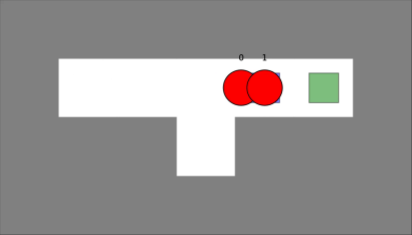

# **Conflict based search:**

>Conflict based search or in short refered to as CBS is a multi-agent path finding algorithm.  CBS is a continuum of coupled and decoupled approaches.


> **Coupled	approach:**
* Agents are	planned	together
* Can	be	optimal	
* Complete	
* Exponentially	hard	

>**Decoupled	approach:**
*	Every	agent	plans	separately	
*	Fast	
*	Non	optimal	
*	Many	times	not	complete	

> MAPF problem is solved by CBS by decomposing the MAPF into exponential number of single-agent pathfinding problems. 
>
>**CBS has two levels:**
* The low-level finds optimal paths for the individual agents.
* The high-level of CBS searches the constraint tree (CT). The CT is a binary tree, in which each node N contains: 
       1. A set of constraints imposed on the agents (N.constraints),
       2. A single solution (N.solution) consistent with these constraints, 
       3. The cost of N.solution (N.cost).




# **Algorithm for Conflict based search:**

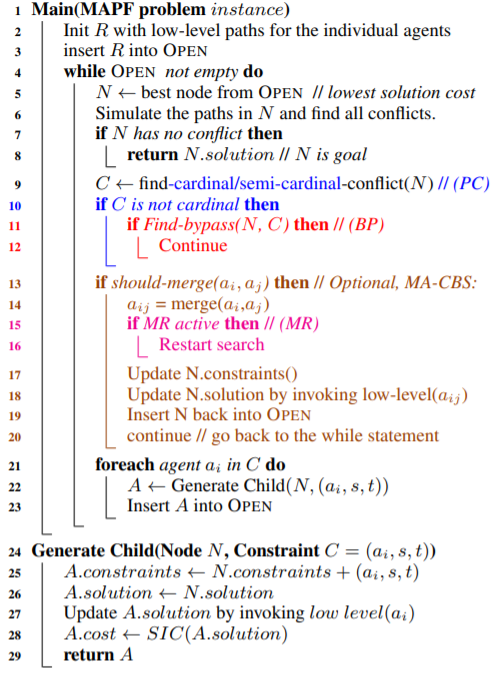